<h1 style="color:Blue; padding:20px; text-align:center; border-radius:10px">01. Numerical Data Visualization</h1>

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-size: 110%">
    <p>Data visualization helps in anlysing the features of the data and helps in feature selction. In this section we will </p>
    <ol>
        <li>Import Cleaned Data.</li>
        <li>Split in Categorical and Numerical Features.</li>
        <li>Visualize Numerical Data.</li>
    </ol>
</div>

### Standard Imports.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import klib as kl
import matplotlib.pyplot as plt

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Disable pretty
%pprint

%matplotlib inline

pd.set_option('display.max_columns', None)
sns.set() 

Pretty printing has been turned OFF


In [3]:
# Global parameters for figure
plt.rcParams["figure.figsize"] = [10.00, 8.00]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.autolayout"] = True

In [4]:
# Converts a categorical fearture to a dataframe with category_labels, counts, and probability
def convert_to_df(feature,df):
    cols = len(df[feature].unique())

    data_gender = np.concatenate((
        np.array(df[feature].unique()),
        np.array(df[feature].value_counts()),
        df[feature].value_counts() / len(df[feature])), axis=0).reshape(3,cols).T

    df = pd.DataFrame(data_gender,
                       columns=[feature, 'counts','probability'])
    return df

### 1. Import Cleaned Data.

In [52]:
# url_data = (r'https://raw.githubusercontent.com/oderofrancis/rona/main/Countries-Continents.csv')

# data_csv = pd.read_csv(url_data)

# import pandas as pd
# url = 'https://raw.githubusercontent.com/Muralimekala/python/master/Resp2.csv'
# df1 = pd.read_csv(url)
# # Dataset is now stored in a Pandas Dataframe

#  https://raw.githubusercontent.com/AamirKhaan/Student-Academic-Performance/main/data/xAPI-Edu-Data.csv

In [5]:
# Loading the Student's data
data = pd.read_csv('./data/xAPI-Edu-Data_cleaned.csv')
data = kl.data_cleaning(data)

Long column names detected (>25 characters). Consider renaming the following columns ['parent_school_satisfaction'].
Shape of cleaned data: (478, 17)Remaining NAs: 0

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.05 MB (-83.33%)



In [6]:
# Cheack the data is properly loaded
data.head()

,gender,nationality,place_of_birth,stage_id,grade_id,section_id,topic,semester,relation,raised_hands,visited_resources,announcements_view,discussion,parent_answering_survey,parent_school_satisfaction,student_absence_days,class
0,M,Kuwait,Kuwait,LowerLevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,Kuwait,Kuwait,LowerLevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,Kuwait,Kuwait,LowerLevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,Kuwait,Kuwait,LowerLevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,Kuwait,Kuwait,LowerLevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [7]:
# Data Characteristics
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   gender                      478 non-null    category
 1   nationality                 478 non-null    category
 2   place_of_birth              478 non-null    category
 3   stage_id                    478 non-null    category
 4   grade_id                    478 non-null    category
 5   section_id                  478 non-null    category
 6   topic                       478 non-null    category
 7   semester                    478 non-null    category
 8   relation                    478 non-null    category
 9   raised_hands                478 non-null    int8    
 10  visited_resources           478 non-null    int8    
 11  announcements_view          478 non-null    int8    
 12  discussion                  478 non-null    int8    
 13  parent_answering_sur

### 2. Split in Categorical and Numerical Features.

In [8]:
CATEGORICAL_FEATURES = list([column for column in data.columns if data.dtypes[column] == 'category'])[:-1]
CATEGORICAL_FEATURES

['gender', 'nationality', 'place_of_birth', 'stage_id', 'grade_id', 'section_id', 'topic', 'semester', 'relation', 'parent_answering_survey', 'parent_school_satisfaction', 'student_absence_days']

In [9]:
NUMERICAL_FEATURES = list([column for column in data.columns if data.dtypes[column] != 'category'])
NUMERICAL_FEATURES

['raised_hands', 'visited_resources', 'announcements_view', 'discussion']

In [21]:
TARGET ='class'

### 3. Visualize Numerical Data.

### Introduction:

Categorical data can have following issues when considered for training ML models:

**Cardinalty:** Variables with too many labels tend to dominate over those with only few labels, particularly in Tree based Algorithms.

**Rare Labels:** Rare labels may be present in trianig set, but not in test set, causing over-fitting to the train set.

**Rare Labels:** Rare labels may appear in the test set, and not in the train set. Thus, the machine learning model will not know how to evaluate it for scoring.





In [22]:
NUMERICAL_FEATURES = list([column for column in data.columns if data.dtypes[column] != 'category'])
NUMERICAL_FEATURES.append(TARGET)
NUMERICAL_FEATURES

['raised_hands', 'visited_resources', 'announcements_view', 'discussion', 'class']

In [23]:
numerical_df = data[NUMERICAL_FEATURES]
numerical_df.head()

,raised_hands,visited_resources,announcements_view,discussion,class
0,15,16,2,20,M
1,20,20,3,25,M
2,10,7,0,30,L
3,30,25,5,35,L
4,40,50,12,50,M


In [25]:
stats = numerical_df.describe()
stats.transpose()

,count,mean,std,min,25%,50%,75%,max
raised_hands,478.0,46.887029,30.787903,0.0,16.00,50.0,75.0,100.0
visited_resources,478.0,54.974895,33.035071,0.0,20.00,65.0,84.0,99.0
announcements_view,478.0,38.014644,26.623507,0.0,14.25,33.0,58.0,98.0
discussion,478.0,43.410042,27.620961,1.0,20.00,39.5,70.0,99.0


In [26]:
plt.rcParams["figure.figsize"] = [8.00, 6.00]

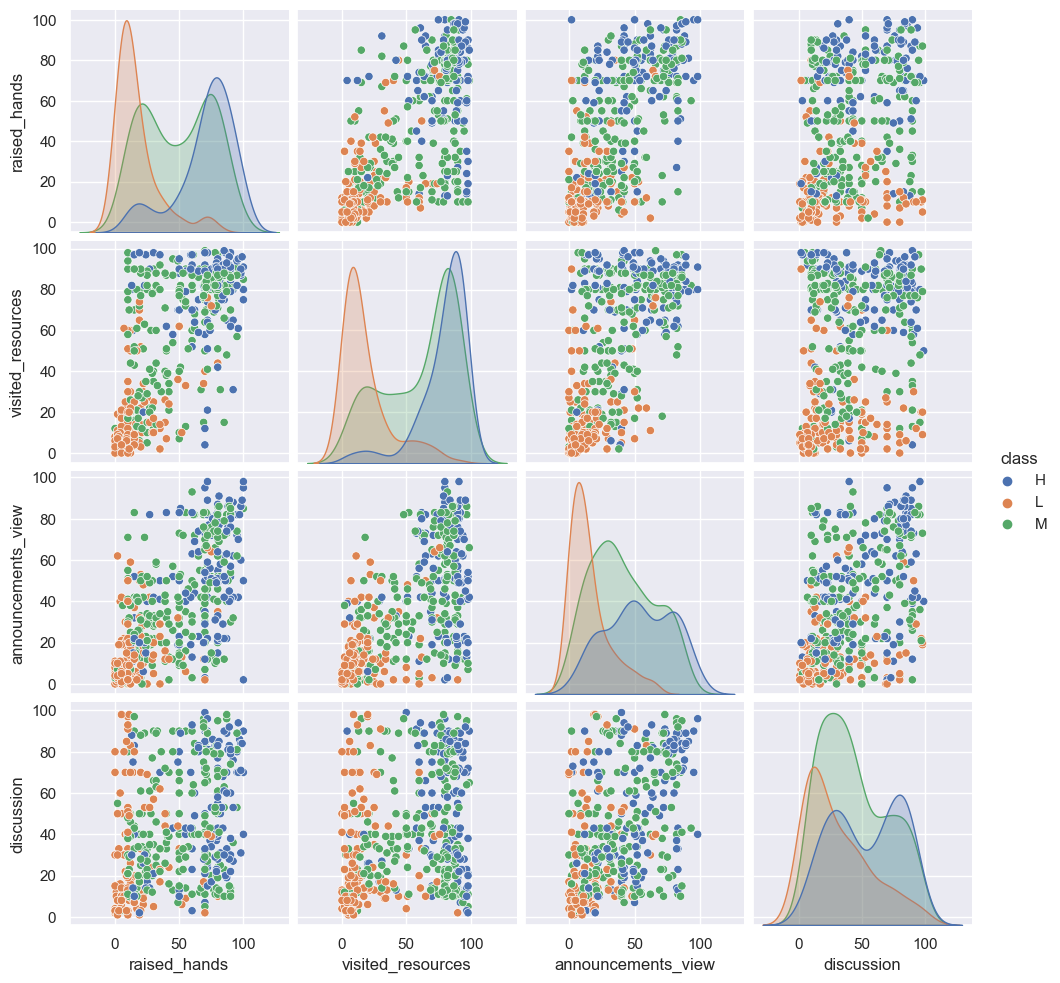

In [27]:
sns.pairplot(numerical_df, hue='class')

In [28]:
NUMERICAL_FEATURES

['raised_hands', 'visited_resources', 'announcements_view', 'discussion', 'class']

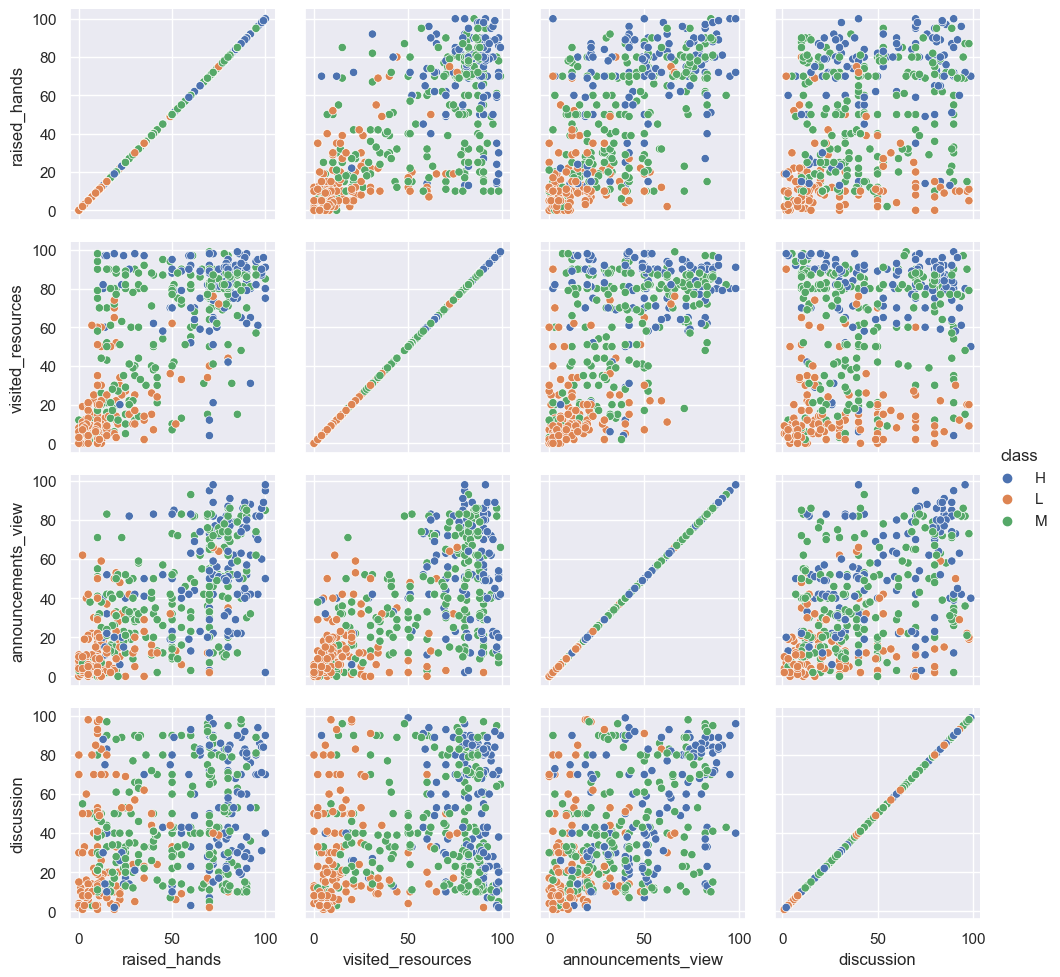

In [51]:
#plt.rcParams["figure.figsize"] = [5.00, 5.00]
##num_g = sns.PairGrid(numerical_df, hue='class')
#num_g.map(plt.scatter)
#num_g.map_diag(plt.hist)
#num_g.map_offdiag(plt.scatter)
# #iris_g.map_offdiag(plt.scatter)
# iris_g.map_upper(plt.scatter)
# iris_g.map_lower(sns.kdeplot)

num_g = sns.PairGrid(numerical_df, hue='class',
                      x_vars=["raised_hands","visited_resources","announcements_view","discussion"])
                      #y_vars =["announcements_view","discussion"])

#num_g.map(sns.displot)
num_g.map(sns.scatterplot)
num_g.add_legend()

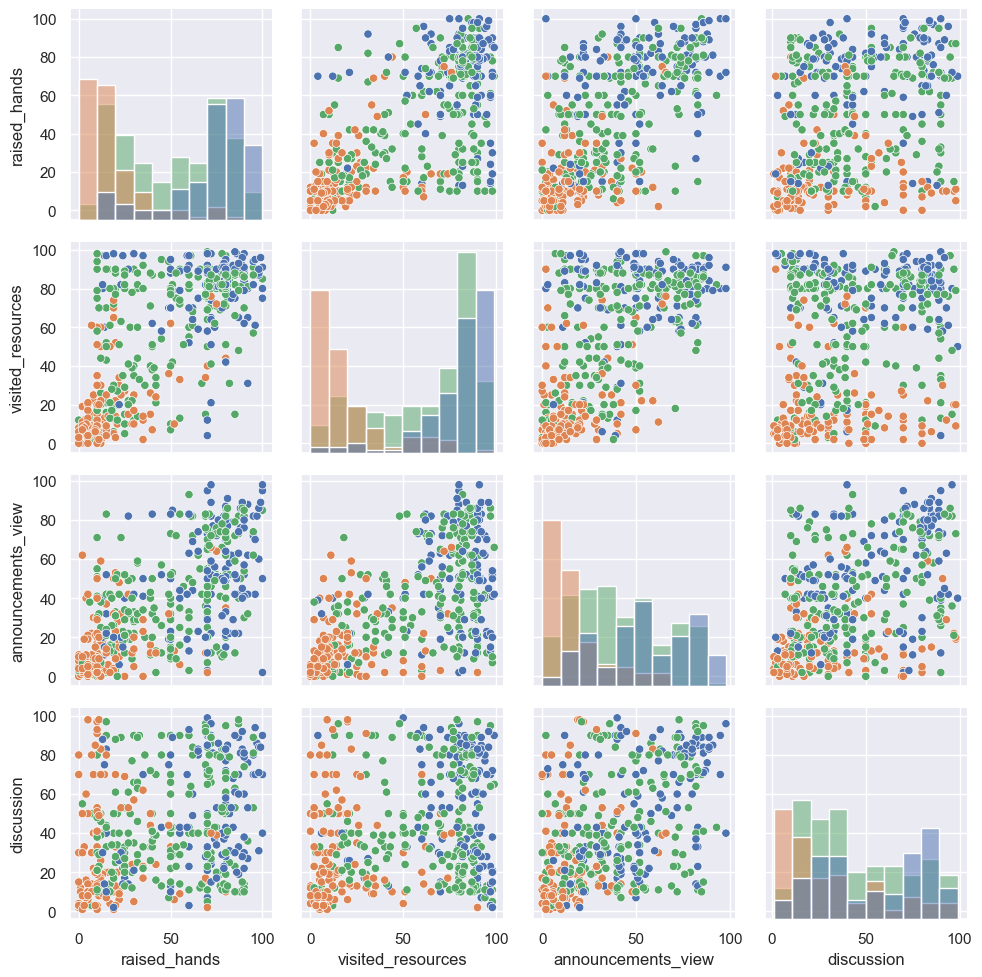

In [30]:
g = sns.PairGrid(numerical_df,hue='class')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

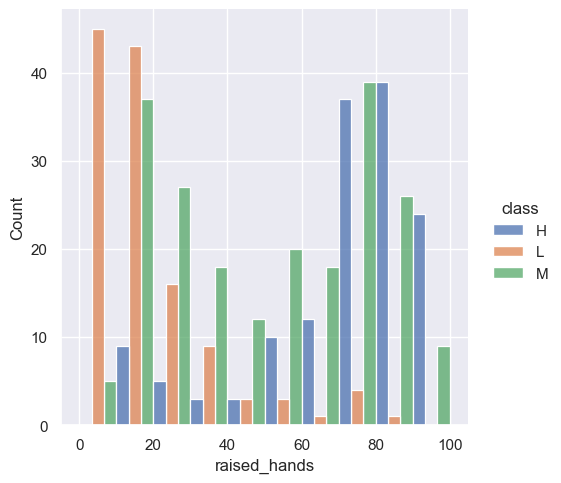

In [31]:
sns.displot(numerical_df, x="raised_hands", hue="class", multiple='dodge')

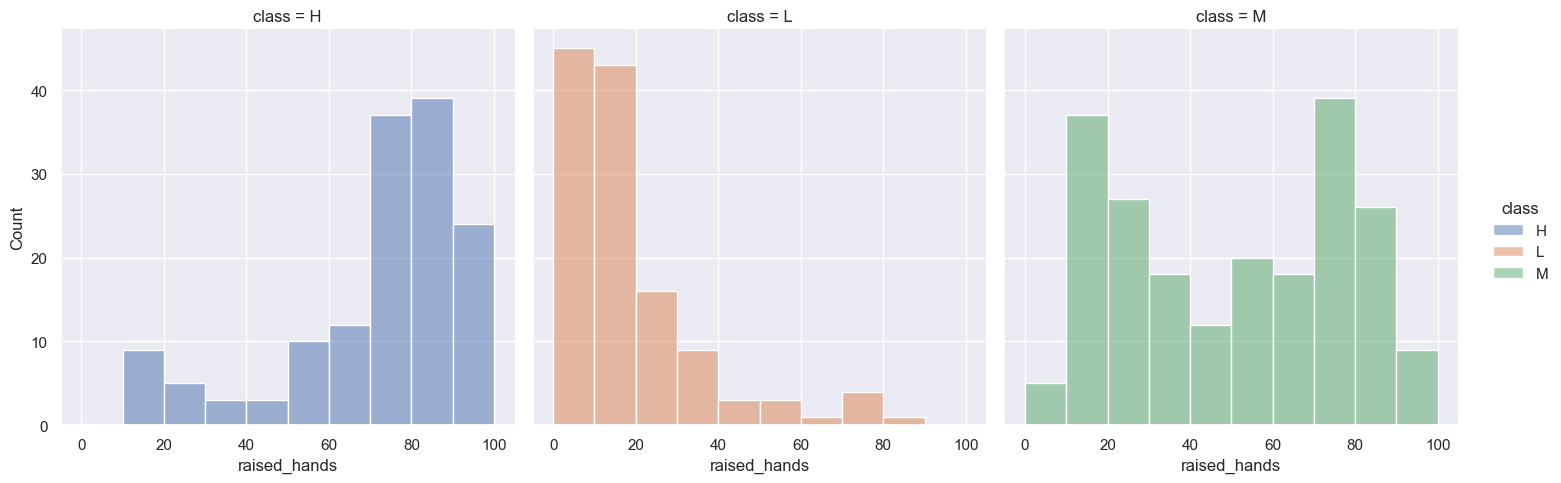

In [36]:
sns.displot(numerical_df, x="raised_hands", col="class", hue='class')

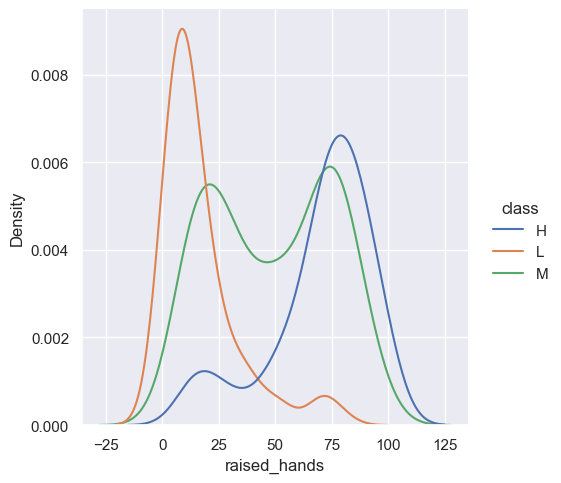

In [40]:
sns.displot(numerical_df, x="raised_hands", hue="class",  kind="kde")

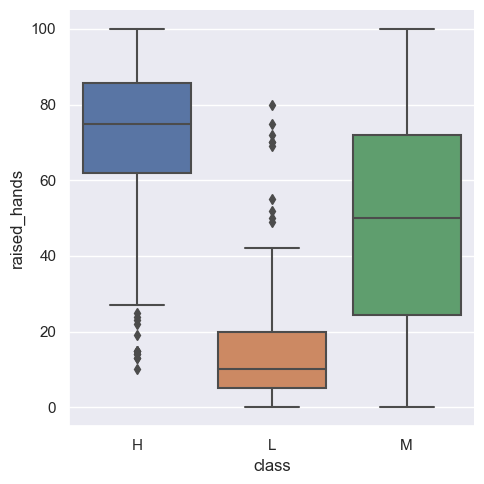

In [34]:
sns.catplot(x="class", y="raised_hands", kind="box", data=numerical_df);
#sns.swarmplot(x="class", y="raised_hands", data=numerical_df, color='gray')

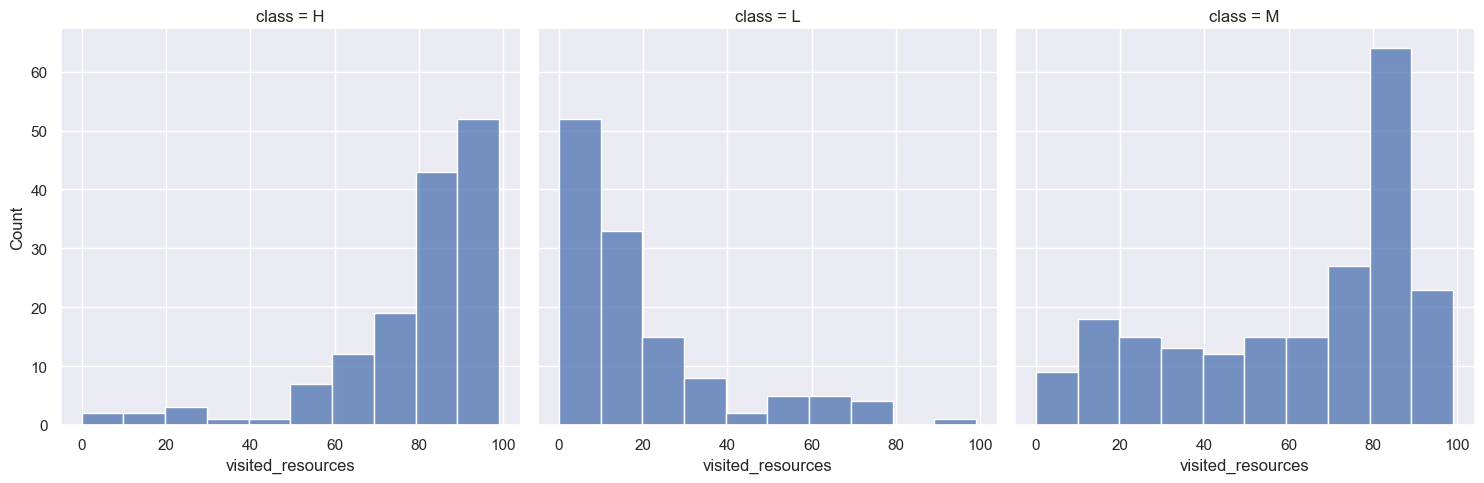

In [35]:
sns.displot(numerical_df, x="visited_resources", col="class")